# Cross-validation: evaluating estimator performance
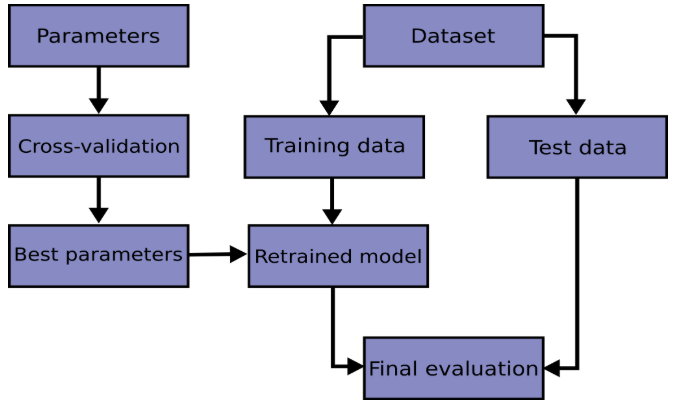


In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm

### load the iris data set to fit a linear support vector machine on it:

In [4]:
iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

### sample a training set while holding out 40% of the data for testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

In [6]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)                           

0.9666666666666667

### Computing cross-validated metrics
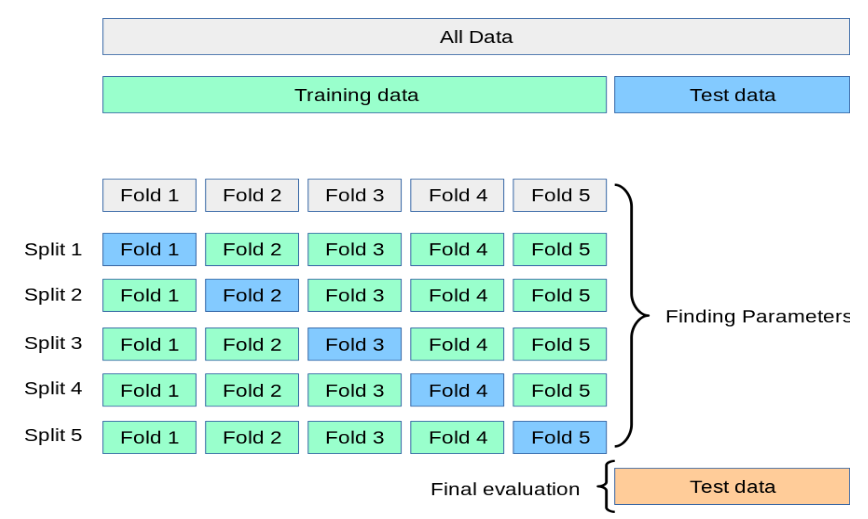

In [59]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [61]:
cv = StratifiedKFold(n_splits=5)      # same as the above
scores = cross_val_score(clf, iris.data, iris.target, cv=cv)
scores
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [62]:
from sklearn import metrics
scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
scores 

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [63]:
from sklearn.model_selection import ShuffleSplit, KFold, StratifiedKFold
n_samples = iris.data.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, iris.data, iris.target, cv=cv)

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

In [64]:
cv = KFold(n_splits=5, shuffle=True)
cross_val_score(clf, iris.data, iris.target, cv=cv)

array([1.        , 0.96666667, 0.93333333, 1.        , 0.96666667])

### Another option:
- to use an iterable yielding (train, test) splits as arrays of indices, 
  for example:

In [65]:
def custom_cv_2folds(X):
     n = X.shape[0]
     i = 1
     while i <= 2:
         idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
         yield idx, idx
         i += 1

custom_cv = custom_cv_2folds(iris.data)
cross_val_score(clf, iris.data, iris.target, cv=custom_cv)

array([1.        , 0.97333333])

### Data transformation with held out data
- Just as it is important to test a predictor on data held-out from training,
  preprocessing (such as standardization, feature selection, etc.) and similar
  data transformations similarly should be learnt from a training set and 
  applied to held-out data for prediction:

In [66]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
     iris.data, iris.target, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)  

0.9333333333333333

- A Pipeline makes it easier to compose estimators, providing this behavior 
  under cross-validation:

In [67]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, iris.data, iris.target, cv=cv)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])